In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [4]:
def preprocess(array):
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

def noise(array):
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
      loc=0.0, scale=1.0, size=array.shape
  )

  return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
  n = 10

  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]

  plt.figure(figsize=(20, 4))

  for i, (image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(image2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

11501568/11490434 [==============================] - 0s 0us/step


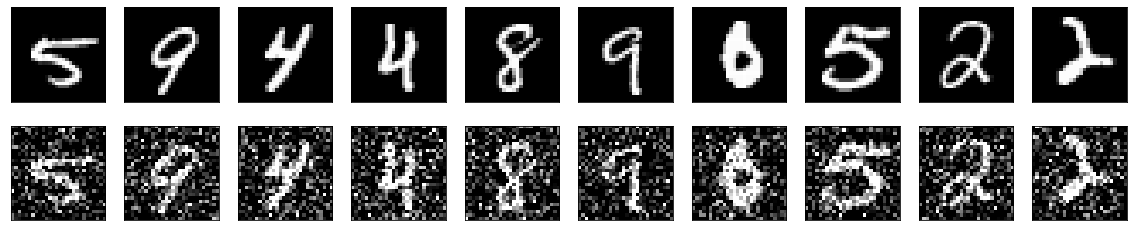

In [5]:
(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)

In [6]:
input = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [7]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 16s 9ms/step - loss: 0.1282 - val_loss: 0.0724
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0711 - val_loss: 0.0692
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0690 - val_loss: 0.0678
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0678 - val_loss: 0.0668
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0670 - val_loss: 0.0662
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0664 - val_loss: 0.0656
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0659 - val_loss: 0.0653
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0655 - val_loss: 0.0649
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0651 - val_loss: 0.0646
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0649 - val_loss: 0.064

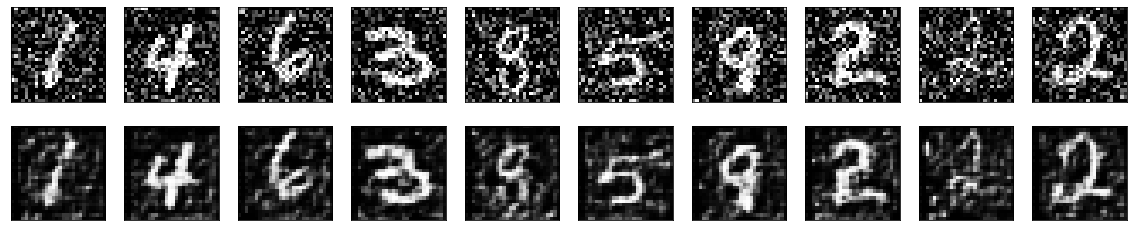

In [8]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)